<a href="https://colab.research.google.com/github/cristian0527/MATH-383/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
### Cristian Castellanos
### Network Data

## Load packages

In [89]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
import matplotlib.cm as cm
import math
import requests
import json
from networkx.readwrite import json_graph
import pandas as pd
import csv
from sklearn.cluster import KMeans

## Problem 2
#### Loading my Ego Network

In [77]:
my_ego_network = nx.Graph()
my_ego_network.add_node('Cristian')

In [78]:
my_ego_network.add_nodes_from(['Zey','Aqib','Joaquin', 'Ali', 'Luz', 'Classmate'])
my_ego_network.add_edge('Cristian','Zey')
my_ego_network.add_edge('Cristian','Aqib')
my_ego_network.add_edge('Cristian','Joaquin')
my_ego_network.add_edge('Cristian','Ali')
my_ego_network.add_edge('Cristian','Luz')

In [79]:
my_ego_network.add_nodes_from(['Luz','Aqib','Joaquin', 'Ali', 'Zey', 'Classmate'])
my_ego_network.add_edges_from([
    ('Cristian','Luz'),
    ('Cristian','Aqib'),
    ('Cristian','Joaquin'),
    ('Cristian','Ali'),
    ('Cristian','Zey'),
    ('Cristian','Classmate')
])

my_ego_network.add_edges_from([
    ('Zey','Ali'),
    ('Aqib','Ali'),
    ('Aqib', 'Joaquin'),
    ('Ali','Joaquin')
])

In [80]:
my_ego_network.nodes['Cristian']['Age']=20
my_ego_network.nodes['Aqib']['Age']=19
my_ego_network.nodes['Luz']['Age']=19
my_ego_network.nodes['Ali']['Age']=21
my_ego_network.nodes['Zey']['Age']=22
my_ego_network.nodes['Joaquin']['Age']=19
my_ego_network.nodes['Classmate']['Age']=19

my_ego_network.nodes['Cristian']['ClassYear']='Junior'
my_ego_network.nodes['Aqib']['ClassYear']='Sophomore'
my_ego_network.nodes['Luz']['ClassYear']='Sophomore'
my_ego_network.nodes['Ali']['ClassYear']='Junior'
my_ego_network.nodes['Zey']['ClassYear']='Senior'
my_ego_network.nodes['Joaquin']['ClassYear']='Sophomore'
my_ego_network.nodes['Classmate']['ClassYear']='Junior'

#### Visualization of Ego Network

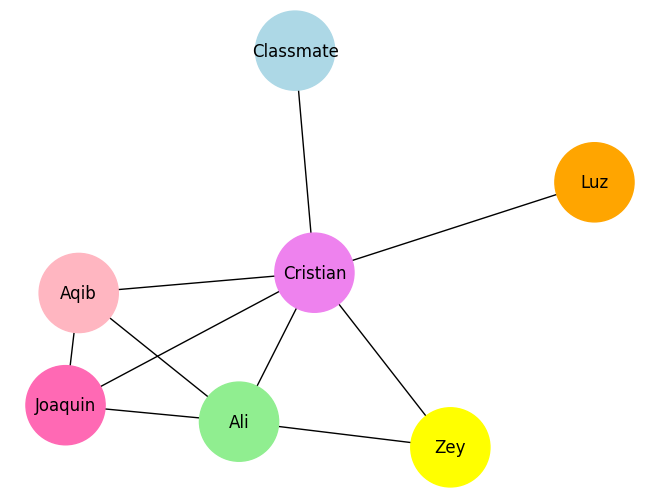

In [81]:
# nx.draw(my_ego_network,with_labels=True, node_size=2500)
color_dictionary = {'Cristian':'violet','Classmate':'lightblue','Ali':'lightgreen','Joaquin':'hotpink','Luz':'orange','Zey':'yellow', 'Aqib':'lightpink'}
nx.draw(my_ego_network,with_labels=True, node_size=3250,node_color = [color_dictionary[name] for name in my_ego_network.nodes()])

### Problem 2 (A): Compute the betweenness centrality of each node of your ego network.

In [82]:
my_ego_network_between = nx.betweenness_centrality(my_ego_network)
for name, score in my_ego_network_between.items():
    print(f"{name}'s betweenness centrality score is {score}.")

Cristian's betweenness centrality score is 0.6666666666666666.
Zey's betweenness centrality score is 0.0.
Aqib's betweenness centrality score is 0.0.
Joaquin's betweenness centrality score is 0.0.
Ali's betweenness centrality score is 0.06666666666666667.
Luz's betweenness centrality score is 0.0.
Classmate's betweenness centrality score is 0.0.


### Problem 2 (B): Determine which pair of your friends that are not connected in the original network have the least similar connectivity pattern. Add an edge between them and recompute the betweeness centralities. What do you observe?

A pair of my friends who are not connected in the original network with the least similar connectivity pattern is Luz and Ali. After adding a edge between them and recalculating the betweenness centrality scores, Luz's score remained the same, though Ali's score increased by .1

This makes sense because Luz is still a peripheral node, while Ali now becomes a bridge between Luz and the rest of the network. Unlike before, where I was the only bridge between Luz and the other nodes. Because of this, my betweenness score decreased because my ego network is now less dependent on me as the bridge to connect with Luz. This shows how adding an edge between nodes that are not similar (such as a peripheral node and a more connected node) redistributes the betweenness centrality in a network.

In [83]:
# Asked Gemini for line 7
# At first I didn't have it
# Though it gave me a list with duplicated pairs that are not connected
# Noticed though that it's O(N^2) time complexity
# Which is fine for my ego network
# Though if I did this on a much more larger network
# It would take some time to get back results

my_ego_network_b = my_ego_network.copy()

for node_i in my_ego_network_b.nodes():
    for node_j in my_ego_network_b.nodes():
        if node_i < node_j:
            if not my_ego_network_b.has_edge(node_i, node_j):

                neighbors_i = set(my_ego_network_b.neighbors(node_i))
                neighbors_j = set(my_ego_network_b.neighbors(node_j))

                common = neighbors_i.intersection(neighbors_j)
                common_count = len(common)

                print(f"({node_i}, {node_j}): {common_count} common neighbors {common}")

(Aqib, Zey): 2 common neighbors {'Cristian', 'Ali'}
(Aqib, Luz): 1 common neighbors {'Cristian'}
(Aqib, Classmate): 1 common neighbors {'Cristian'}
(Joaquin, Zey): 2 common neighbors {'Cristian', 'Ali'}
(Joaquin, Luz): 1 common neighbors {'Cristian'}
(Ali, Luz): 1 common neighbors {'Cristian'}
(Ali, Classmate): 1 common neighbors {'Cristian'}
(Luz, Zey): 1 common neighbors {'Cristian'}
(Classmate, Zey): 1 common neighbors {'Cristian'}
(Classmate, Joaquin): 1 common neighbors {'Cristian'}
(Classmate, Luz): 1 common neighbors {'Cristian'}


Cristian's betweenness centrality score is 0.5.
Zey's betweenness centrality score is 0.0.
Aqib's betweenness centrality score is 0.0.
Joaquin's betweenness centrality score is 0.0.
Ali's betweenness centrality score is 0.16666666666666666.
Luz's betweenness centrality score is 0.0.
Classmate's betweenness centrality score is 0.0.


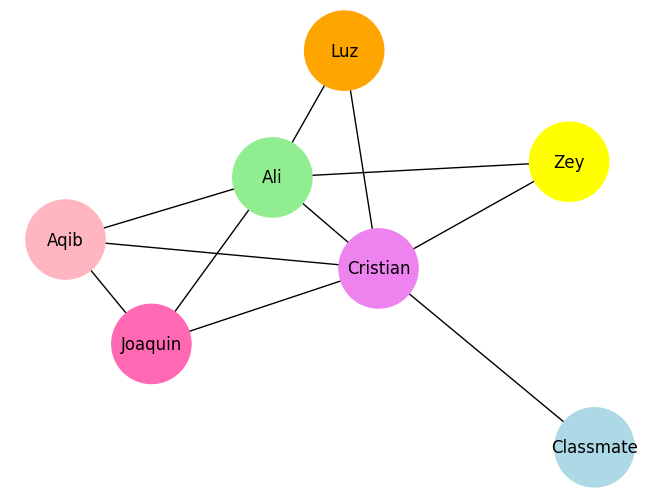

In [84]:
# Adding edge between Luz & Classmate
my_ego_network_b.add_edge('Luz', 'Ali')
my_ego_network_between = nx.betweenness_centrality(my_ego_network_b)
for name, score in my_ego_network_between.items():
    print(f"{name}'s betweenness centrality score is {score}.")

nx.draw(my_ego_network_b,with_labels=True, node_size=3250,node_color = [color_dictionary[name] for name in my_ego_network.nodes()])

### Problem 2 (C): What do you think would happen if you had instead connected the most similar non-friends.

I think if I had instead connected the most similar non-friends, I don't think much of a change would have happened when we recomputed the betweenness centrality scores. To elaborate, if I had connected an edge between my friends Aqib and Zey, they both have 2 common neighbors. So connecting them would be kind of redundant because they are already connected through mutual friends, Ali and me. This would just make the path to get to the other shorter.

In [85]:
my_ego_network_c = my_ego_network.copy()

my_ego_network_c.add_edge('Aqib', 'Zey')
my_ego_network_between_c = nx.betweenness_centrality(my_ego_network_c)
for name, score in my_ego_network_between_c.items():
    print(f"{name}'s betweenness centrality score is {score}.")


Cristian's betweenness centrality score is 0.6222222222222222.
Zey's betweenness centrality score is 0.0.
Aqib's betweenness centrality score is 0.02222222222222222.
Joaquin's betweenness centrality score is 0.0.
Ali's betweenness centrality score is 0.02222222222222222.
Luz's betweenness centrality score is 0.0.
Classmate's betweenness centrality score is 0.0.


## Problem 3 Dolphins
### Problem 3 (A): Implement a random walk of 500 steps on the dolphins network, tracking the current position of the walker and the number of times the node has been visited over the full walk. Plot the network with the nodes colored by the number of times each dolphin was visited. Compare this plot to a version where the nodes are colored by the degree centrality. What would we expect to happen as the number of steps goes to infinity?

1. Looking at both network, the color patterns are already kind of similar at 500 steps. The same central nodes appear as red/orange hotspots in both, while peripheral nodes stay dark blue in both. The differences between these networks are just noise from the walk being too short to fully flesh out.

2. As the number of steps goes to infinity, the visit frequencies will converge exactly to that of the degree centrality colored network, that's because the more degrees a node has, the more it is likely to be visited during a random walk.

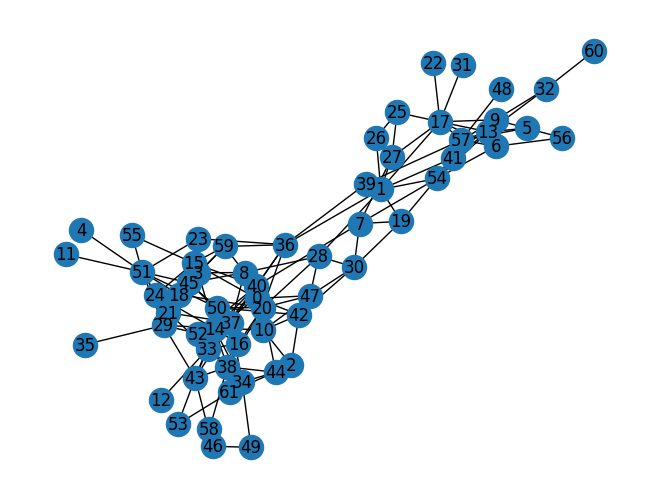

In [182]:
loaded_matrix = np.loadtxt("./dolphins.csv", delimiter=",")
dolphin_graph_loaded = nx.from_numpy_array(loaded_matrix)

pos = nx.spring_layout(dolphin_graph_loaded, seed=67)
nx.draw(dolphin_graph_loaded, pos, with_labels=True)

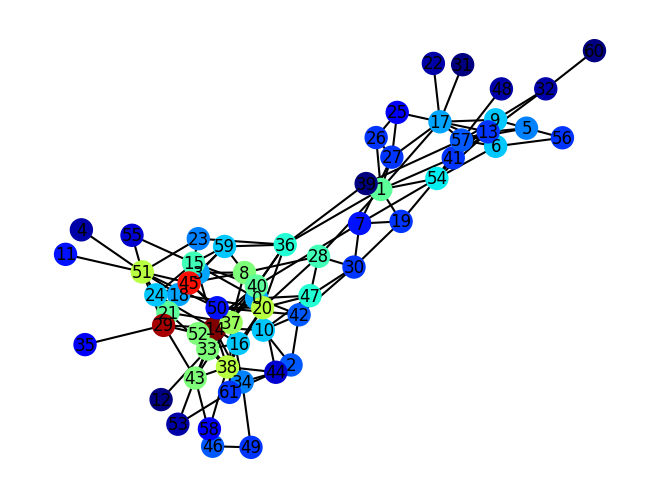

In [173]:
# Random Walk Network
node_colors = {x:0 for x in dolphin_graph_loaded.nodes}
state = random.choice(list(dolphin_graph_loaded.nodes()))

for sample in range(500):

    old_state = state

    state = random.choice(list(dolphin_graph_loaded.neighbors(state)))
    node_colors[state] += 1

pos = nx.spring_layout(dolphin_graph_loaded, seed=67)
# I know that since this is a randomly generated model, I asked Gemini to help me have this set to a specific seed so it reruns the same structure!

plt.figure()
nx.draw(dolphin_graph_loaded, pos=pos, node_color=[node_colors[x] for x in dolphin_graph_loaded.nodes()], width=1.5, cmap="jet", node_size=250, node_shape='o', with_labels=True)
plt.show()

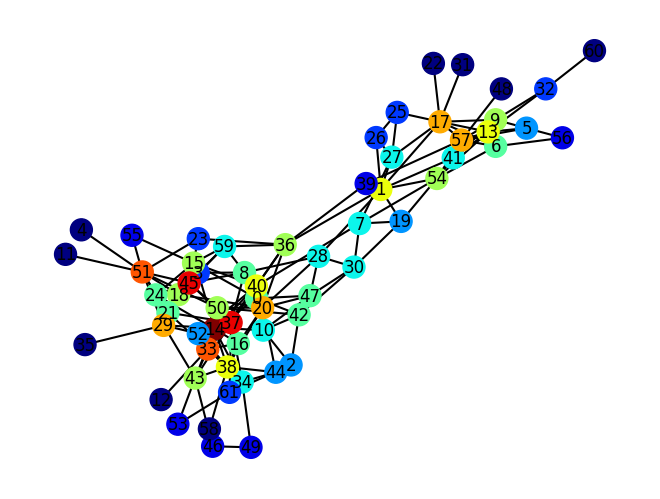

In [194]:
# degree centrality network
degree_centrality = nx.degree_centrality(dolphin_graph_loaded)
pos = nx.spring_layout(dolphin_graph_loaded, seed=67)

plt.figure()
nx.draw(dolphin_graph_loaded, pos=pos,
        node_color=[degree_centrality[x] for x in dolphin_graph_loaded.nodes()],
        cmap="jet", node_size=250, width=1.5, with_labels=True)
plt.show()

### Problem 3 (B): Which nodes have the largest difference between their eigenvector centrality score and its pagerank score? Explain anything you observe about these nodes.

The nodes with the largest differences, (14, 37, 45, 33, 50), all sit in the dense core of the network and have high eigenvector scores, but low pagerank scores. This is because eigenvector centrality rewards being connected to other well connected nodes, which these core nodes are. Pagerank's random teleportation spreads the probability mass more evenly across the whole network, which prevents any one region from dominating. We can see this in the pagerank network, which is almost uniformly dark blue with some variation across.

In [186]:
# helper function
def simulate_PageRank(network, steps, p):
    state = random.choice(list(network.nodes()))

    node_density = {x:0 for x in network.nodes}
    for i in range(steps):

        old_state = state

        if len(list(network.neighbors(state))) ==0:

            state = random.choice(list(network.nodes()))

        else:
            if random.random() < 1-p:

                state = random.choice(list(network.neighbors(state)))
            else:
                state = random.choice(list(network.nodes()))

        node_density[state]+=1

    pos = nx.spring_layout(dolphin_graph_loaded, seed=67)
    plt.figure(figsize=[8,8])
    nx.draw(network,node_color = [node_density[x] for x in network.nodes()], pos=pos,
        width =3, cmap="jet",node_shape='o',vmin = 0, vmax = max(100,max([node_density[x] for x in network.nodes()])), with_labels=True)
    plt.show()

    return node_density

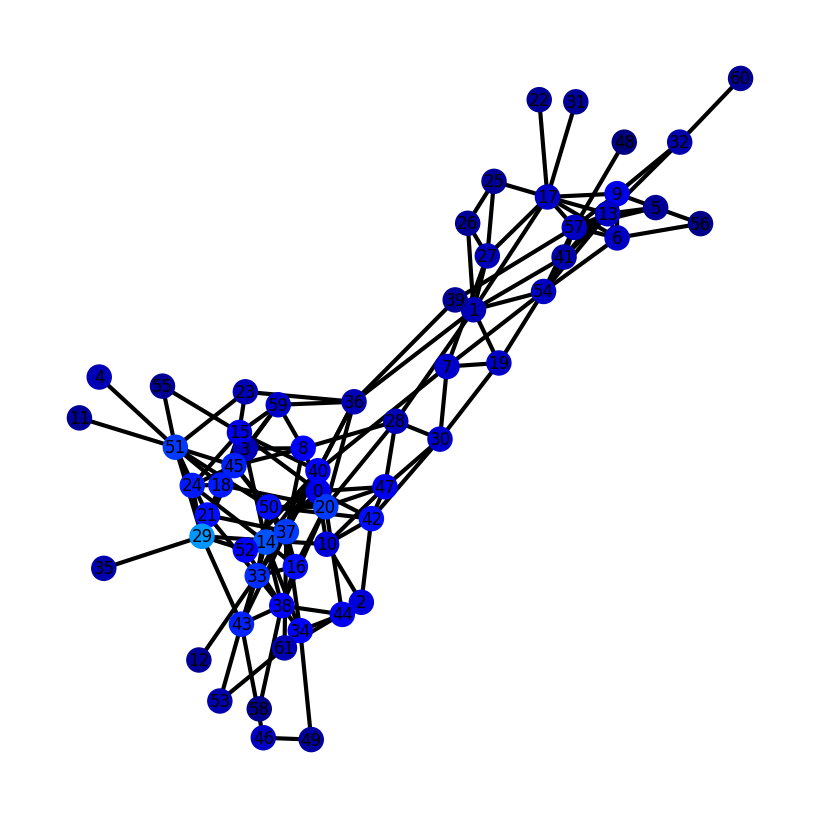

In [188]:
eigenvector_centrality = nx.eigenvector_centrality(dolphin_graph_loaded)

dolphins_pagerank = simulate_PageRank(dolphin_graph_loaded,500, 0.2)

In [189]:
dolphins_pagerank

{0: 9,
 1: 5,
 2: 8,
 3: 5,
 4: 5,
 5: 2,
 6: 6,
 7: 7,
 8: 12,
 9: 9,
 10: 8,
 11: 2,
 12: 2,
 13: 6,
 14: 21,
 15: 9,
 16: 14,
 17: 6,
 18: 15,
 19: 6,
 20: 18,
 21: 14,
 22: 2,
 23: 5,
 24: 15,
 25: 2,
 26: 2,
 27: 5,
 28: 5,
 29: 27,
 30: 7,
 31: 2,
 32: 4,
 33: 17,
 34: 11,
 35: 4,
 36: 5,
 37: 18,
 38: 11,
 39: 2,
 40: 11,
 41: 4,
 42: 14,
 43: 16,
 44: 10,
 45: 16,
 46: 6,
 47: 10,
 48: 0,
 49: 3,
 50: 14,
 51: 18,
 52: 11,
 53: 4,
 54: 6,
 55: 2,
 56: 1,
 57: 6,
 58: 1,
 59: 7,
 60: 2,
 61: 5}

In [190]:
eigenvector_centrality

{0: 0.12850351911087216,
 1: 0.042091441435724825,
 2: 0.03975713309801053,
 3: 0.07933447607445522,
 4: 0.02928705714262821,
 5: 0.006572752164517536,
 6: 0.012211980286547353,
 7: 0.042908020056302676,
 8: 0.14310221675120965,
 9: 0.012220169764468436,
 10: 0.07525346435103515,
 11: 0.02928705714262821,
 12: 0.039075861161635285,
 13: 0.015030415487480693,
 14: 0.3157810764804676,
 15: 0.16417491138339668,
 16: 0.20799316926734238,
 17: 0.01753496833868235,
 18: 0.20249300124247627,
 19: 0.020682545955984944,
 20: 0.1844778733532398,
 21: 0.20734961722376988,
 22: 0.002438237539825345,
 23: 0.0873620226040391,
 24: 0.1932118098330091,
 25: 0.005952326426510387,
 26: 0.00894919228768804,
 27: 0.01632668732073103,
 28: 0.06822697202643725,
 29: 0.21176109464474224,
 30: 0.04075065098782638,
 31: 0.002438237539825345,
 32: 0.0038643437589662884,
 33: 0.281097017160587,
 34: 0.13882725110356872,
 35: 0.029437314009677577,
 36: 0.13276550630017522,
 37: 0.3005609284704956,
 38: 0.19661653

I normalized the PageRank so that we get proportions that also sum up to 1, so it would give us a more meaningful answer when we subtract the

In [195]:
total_visits = sum(dolphins_pagerank.values())
pagerank_normalized = {node: count/total_visits for node, count in dolphins_pagerank.items()}

difference = {node: abs(eigenvector_centrality[node] - pagerank_normalized[node])
              for node in dolphin_graph_loaded.nodes()}
difference

results = pd.DataFrame({
    "eigenvector": eigenvector_centrality,
    "pagerank": pagerank_normalized,
    "difference": difference
})

results.sort_values("difference", ascending=False).head(15)

,eigenvector,pagerank,difference
14,0.315781,0.042,0.273781
37,0.300561,0.036,0.264561
45,0.285003,0.032,0.253003
33,0.281097,0.034,0.247097
50,0.217691,0.028,0.189691
40,0.207873,0.022,0.185873
16,0.207993,0.028,0.179993
21,0.207350,0.028,0.179350
51,0.210680,0.036,0.174680
38,0.196617,0.022,0.174617


### Problem 3 (C): Compute the degree, closeness, and betweenness centralities for the dolphins network. Then perturb the network by randomly deleting 5% of the edges that are in the original network and adding 5% of the edges that are not in the original network. Recompute the degree, closeness, and betweeness centralities for the new network and comment on which centrality measure appears to be most robust to this type of perturbation.

After calculating the degree, closeness, and betweenness centralities for the dolphins' network. Then perturbing the network by randomly deleting 5% of the edges that are in the original network and adding 5% of the edges that are not in the original network. Following up with that by recomputing the degree, closeness, and betweenness centralities for this new network, I noticed that the centrality measure that appears to be the most robust to this type of perturbation is degree centrality. This makes sense since we are only deleting and adding 5% of the network's edges, so most nodes' degree scores won't change at all after a 5% perturbation.

In [ ]:
# Centrality Scores for the original Dolphin Network

degree_original = nx.degree_centrality(dolphin_graph_loaded)
closeness_original = nx.closeness_centrality(dolphin_graph_loaded)
betweenness_original = nx.betweenness_centrality(dolphin_graph_loaded)

original_centralities = pd.DataFrame({
    "degree": degree_original,
    "closeness": closeness_original,
    "betweenness": betweenness_original
})

original_centralities

,degree,closeness,betweenness
0,0.098361,0.346591,0.019083
1,0.131148,0.371951,0.213324
2,0.065574,0.282407,0.009073
3,0.049180,0.308081,0.002374
4,0.016393,0.248980,0.000000
...,...,...,...
57,0.147541,0.301980,0.084205
58,0.016393,0.248980,0.000000
59,0.081967,0.342697,0.020333
60,0.016393,0.178363,0.000000


In [149]:
# perturb the network by randomly deleting 5% of the edges that are in the original
# network and adding 5% of the edges that are not in the original network.

perturbed = dolphin_graph_loaded.copy()
edges = list(perturbed.edges())
n_edge = int(0.05 * len(edges)) # since we can't delete/add a continuous n number of edges, we must use the floor
n_edge # output: 7 (without the int, we would get 7.95)

all_nodes = list(perturbed.nodes())
non_edges = list(nx.non_edges(perturbed))

# deleting
edges_to_delete = random.sample(edges, n_edge)
perturbed.remove_edges_from(edges_to_delete)

# adding
edges_to_add = random.sample(non_edges, n_edge)
perturbed.add_edges_from(edges_to_add)

degree_perturbed = nx.degree_centrality(perturbed)
closeness_perturbed = nx.closeness_centrality(perturbed)
betweenness_perturbed= nx.betweenness_centrality(perturbed)

perturbed_centralities = pd.DataFrame({
    "degree": degree_perturbed,
    "closeness": closeness_perturbed,
    "betweenness": betweenness_perturbed
})

perturbed_centralities

,degree,closeness,betweenness
0,0.098361,0.365269,0.024025
1,0.114754,0.365269,0.091699
2,0.049180,0.285047,0.006352
3,0.049180,0.331522,0.002455
4,0.032787,0.338889,0.017946
...,...,...,...
57,0.147541,0.348571,0.040676
58,0.016393,0.266376,0.000000
59,0.081967,0.356725,0.013829
60,0.032787,0.276018,0.000546


In [171]:
# calculating differences

degree_diff = abs(original_centralities['degree'] - perturbed_centralities['degree'])
closeness_diff = abs(original_centralities['closeness'] - perturbed_centralities['closeness'])
betweenness_diff = abs(original_centralities['betweenness'] - perturbed_centralities['betweenness'])

differences_centralities = pd.DataFrame({
    "degree": degree_diff,
    "closeness": closeness_diff,
    "betweenness": betweenness_diff
})

# differences_centralities

# calculate the average centrality score among the three methods
avg_diff = differences_centralities.mean().to_frame(name="average absolute change")
avg_diff.sort_values("average absolute change", ascending=True)

,average absolute change
degree,0.006875
betweenness,0.018900
closeness,0.034133


## Problem 4  D. Krackhardt Networks
### The Knets.py file provides the 42 ‘networks’ from D. Krackhardt: Cognitive social structures, Social Networks, 9, 104-134, (1987). The ‘Anets’ are directed advice networks and the ‘Fnets’ are symmetric friendship networks. Rank the 21 individuals according to their importance and determine if there are any communities. This is a wildly underdetermined problem with lots of opportunities to make some modeling decisions and experiment! There are no wrong answers but please document your process and justify any decisions you make

HW1_Knets.ipynb file

## Summary of The Ground Truth about Metadata and Community Detection in Networks:

The authors in this paper challenge the widespread practice of evaluating community detection algorithms by comparing detected communities to node metadata, such as demographics, ethnicity, political views, and so on, and treating such metadata as the “ground truth.” The authors prove this practice is flawed because of the fact that real-world networks have no planted “ground truth” communities, unlike fabricated networks where communities are intentionally built in. When algorithms fail, the failure is ambiguous and (i) could mean the metadata are irrelevant to how the network is structured, (ii) the metadata and detected communities capture different structural aspects, (iii)  the network is too sparse for any algorithm to find clear communities, and or (iiii) the algorithm performs poorly. The authors elaborate how no single algorithm may optimally solve all community detection tasks. There are algorithms that perform amazingly on certain networks and don’t do the job on others. With algorithms, although it would be amazing to have this universal ideal method, the authors showed that this cannot happen since different generative processes with different “ground truth” communities may produce identical networks. This means that ground truth is non-unique. Though, community detection is still a powerful way to understand complex systems. This paper introduces two statistical methods, which are BESTest and neoSBM. BESTest tests whether metadata labels statistically relate to the network structure at all, measuring entropy of the SBM to differentiate relevant metadata from irrelevant. In short, this method creates a null distribution of many generated random permutations of metadata labels with a measure of entropy of each. We can calculate a P-value, which gives us a measure of statistical significance, though does not indicate the strength of correlation. With neoSBM, this method explores whether metadata and network’s detected communities represent the same or different structural aspects by the use of a constraint parameter, which is an allowance of nodes ability to transition from their metadata.
